In [34]:
import pandas as pd
import numpy as np


Importanto bando de datos de de url

In [35]:
url ='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [36]:
df = pd.read_csv(url)
df

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Quitinete;Copacabana;1;0;0;40;1700;500;60
1,Casa;Jardim Botânico;2;0;1;100;7000;;
2,Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...
3,Apartamento;Centro;1;0;0;15;800;390;20
4,Apartamento;Higienópolis;1;0;0;48;800;230;
...,...
32955,Quitinete;Centro;0;0;0;27;800;350;25
32956,Apartamento;Jacarepaguá;3;1;2;78;1800;800;40
32957,Apartamento;São Francisco Xavier;2;1;0;48;1400...
32958,Apartamento;Leblon;2;0;0;70;3000;760;


Al visualizar los datos percibimos que esta separado por ; por tanto vamos corregir la importación

In [37]:
df = pd.read_csv(url, sep=';')
df.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [38]:
type(df)

pandas.core.frame.DataFrame

Para conocer la extrutura de nuestro data frame podemos usar el metodo shape



In [39]:
df.shape

(32960, 9)

Podemos observar que tiene 32960 filas y 9 columnas


Ahora vamos a evaluar las columnas que tenemos disponibles


In [40]:
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

Ya sabemos los nombres de las columnas que conforman nuestro dataframe, ahora vamos a ver
que tipo de información esta contenida en ellas usando el metodo info

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [42]:
df['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [43]:
df[['Quartos','Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


Vamos a realizar algunos análisis que fueron solicitados sobre los datos.

>Algumas perguntas que podemos fazer nesse momento:
> 1. Quais os valores médios de aluguel por tipo de imóvel?
> 2. Qual o percentual de cada tipo de imóvel na nossa base de dados?




In [44]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Valor medio por tipo de alquiler

In [45]:
#Vamos a calcular la media total, para entender el metodo .mean()
df['Valor'].mean()
#El output representa la media de todos los valores de alquiler.

np.float64(12952.659715265761)

In [46]:
#Vamos a utilizar el metodo groupby que nos permite agrupar los datos baseados en otra columna.
#Importante destacar que el metodo groupby siempre esta acompañado por otro metodo que puede ser de algún cálculo.
df.groupby('Tipo').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#El código anterio no funcionó bien porque el metodo mean() se aplica a todas las columnas,
#en nuestro caso también tenemos columnas tipo str. Para resolver eso, dentro del metodo mean
#indicamos que solo será aplicado en las columnas numericas.
df.groupby('Tipo').mean(numeric_only=True).round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.48,1.23,0.88,119.79,4744.61,1722.65,686.17
Box/Garagem,0.06,1.30,0.00,17.52,1899.76,305.45,125.85
Casa,3.13,1.80,1.26,250.58,6793.45,931.28,1582.51
Casa Comercial,1.56,2.20,0.26,372.24,14478.26,1935.71,1707.39
Casa de Condomínio,4.01,3.10,2.86,456.16,11952.06,1342.03,3252.52
Casa de Vila,1.93,0.39,0.23,78.47,1574.37,138.77,183.88
Chácara,3.00,0.00,0.00,0.00,4900.00,NaN,NaN
Conjunto Comercial/Sala,0.04,2.52,0.01,214.47,14715.05,4512.22,1399.60
Flat,1.42,0.96,0.75,65.48,4546.19,2027.72,493.17


In [ ]:
#Como podemos notar nuestro foco es el valor, y ahora tenemos la media de todas las columnas del dataframe.
#Para resolver eso, despues del groupby colocamos el nombre de la columna de interés.
#Como solo tendremos una columna de tipo numérico, ya no es necesario indicar que la media se aplique solo en valores numericos.
#En el caso anterior era necesario porque se estaba aplicando a todas las columnas y tenemos columnas
#que no son numeriocas

In [ ]:
#Ahora solo evaluaremos al columnas de tipo y valor.
df.groupby('Tipo')['Valor'].mean().round(2)

Tipo
Apartamento                      4744.61
Box/Garagem                      1899.76
Casa                             6793.45
Casa Comercial                  14478.26
Casa de Condomínio              11952.06
Casa de Vila                     1574.37
Chácara                          4900.00
Conjunto Comercial/Sala         14715.05
Flat                             4546.19
Galpão/Depósito/Armazém         53407.06
Hotel                           25000.00
Indústria                      120000.00
Loft                             2557.88
Loja Shopping/ Ct Comercial      8126.18
Loja/Salão                      13769.65
Loteamento/Condomínio           22000.00
Pousada/Chalé                    1480.00
Prédio Inteiro                 498637.24
Quitinete                        1246.84
Studio                           2400.00
Sítio                           12499.00
Terreno Padrão                  32567.71
Name: Valor, dtype: float64

Ya tenemos los valores de las medias por tipo. Ahora podemos convertir ese resultado en un data frame para mejorar la visualización, además también podemos ordenar la información. 
Para ello, valor es encerrado en corchetes dobles, y se agregaq el metodo sort_values('Indicando cual será la columna usada para ordenar')

In [ ]:
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor').round(2)

,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


Ahora que ya tenemos organizada la información, podriamos crear un grafico para visualizar la distribución media por tipo. 
para eso crearemos una variable que contenga los valores del dataframe con el nombre media_por_tipo

In [ ]:
media_por_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

Luego podemos crear el grafico usando la biblioteca matplotlib

<Axes: ylabel='Tipo'>

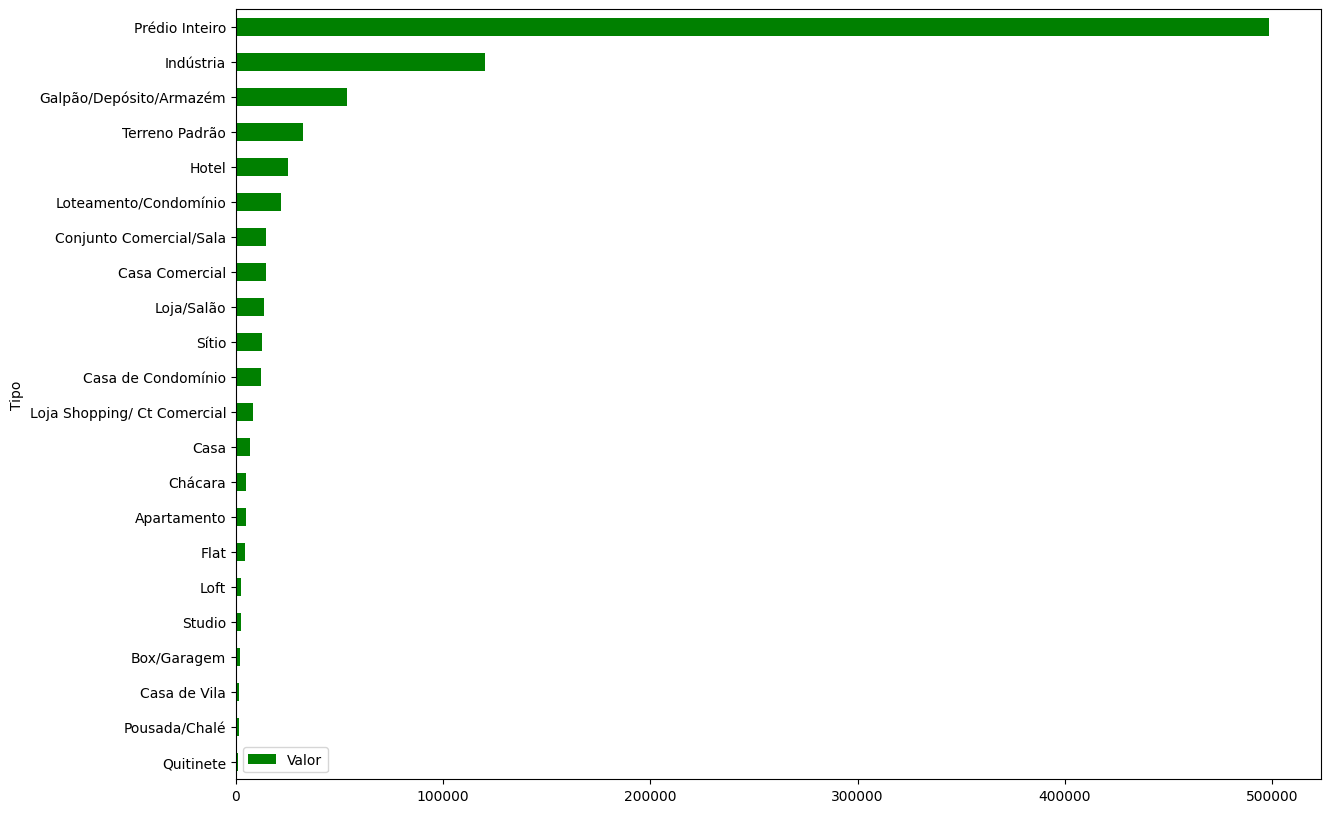

In [ ]:
media_por_tipo.plot(kind='barh', figsize=[14,10], color="green")

Visualmente podemos notar las diferencias entre los distintos tipo de alquiler. Ahora debemos pensar en quién usará la información, y que aspectos son relevantes, por tanto, sabiendo que el equipo de machine learning no tiene interés en los inmuebles de tipo comercial, podemos quitar de nuestro dataframe esas informaciónes para no influenciar en el aprendizaje del modelo